In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.ticker as mtick
import numpy as np

In [2]:
df=pd.read_excel(r"C:\Users\berid\OneDrive\Desktop\mydata\Car Sales.xlsx")

In [3]:
pd.set_option("display.max_columns",100)
df.columns=df.columns.str.strip().str.lower().str.replace(" |_","",regex=True)

In [4]:
df["date"]=pd.to_datetime(df["date"])
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month_name()
df["monthnum"]=df["date"].dt.month
df["priceinthousands"]=df["priceinthousands"]*10**3

In [5]:
df

,date,customername,dealername,company,model,year,bodystyle,engine,transmission,color,priceinthousands,dealeradd,customeraddress,councilarea,phone,gender,annualincome,dealerlocation,dealerno,dealerregion,month,monthnum
0,2016-03-09,Geraldine,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,2016,SUV,DoubleÂ Overhead Camshaft,Auto,Black,26000,44 Walnut St,68 Studley St,Yarra City Council,8264678,Male,13500,44 Walnut St,06457-3834,Middletown,March,3
1,2016-03-12,Gia,C & M Motors Inc,Dodge,Durango,2016,SUV,DoubleÂ Overhead Camshaft,Auto,Black,19000,4333 Ogden Ave,85 Turner St,Yarra City Council,6848189,Male,1480000,4333 Ogden Ave,60504-7114,Aurora,March,3
2,2016-04-02,Gianna,Capitol KIA,Cadillac,Eldorado,2016,Passenger,Overhead Camshaft,Manual,Red,31000,3 Green Tree Trl,25 Bloomburg St,Yarra City Council,7298798,Male,1035000,3 Green Tree Trl,38701-8047,Greenville,April,4
3,2016-04-02,Giselle,Chrysler of Tri-Cities,Toyota,Celica,2016,SUV,Overhead Camshaft,Manual,Pale White,14000,3203 W Marie St,18/659 Victoria St,Yarra City Council,6257557,Male,13500,3203 W Marie St,99301-3882,Pasco,April,4
4,2017-04-03,Grace,Chrysler Plymouth,Acura,TL,2017,Hatchback,DoubleÂ Overhead Camshaft,Auto,Red,24000,6137 S Us-51,5 Charles St,Yarra City Council,7081483,Male,1465000,6137 S Us-51,53546-9427,Janesville,April,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34727,2018-02-24,Thomas,Chrysler Plymouth,Ford,Explorer,2018,Hatchback,DoubleÂ Overhead Camshaft,Auto,Pale White,18000,6942 E McDowell Rd,13 Burns St,Maribyrnong City Council,6905977,Male,1480000,6137 S Us-51,53546-9427,Janesville,February,2
34728,2018-02-24,Amelie,Capitol KIA,Nissan,Quest,2018,SUV,Overhead Camshaft,Manual,Black,12000,8803 Research Blvd,29A Murray St,Maribyrnong City Council,6009564,Male,888000,3 Green Tree Trl,38701-8047,Greenville,February,2
34729,2018-02-24,Loan,Chrysler of Tri-Cities,Chevrolet,Corvette,2018,SUV,DoubleÂ Overhead Camshaft,Auto,Pale White,46000,347 Walnut St,147A Severn St,Maribyrnong City Council,8340959,Male,705000,3203 W Marie St,99301-3882,Pasco,February,2
34730,2018-02-24,Romane,Chrysler Plymouth,Oldsmobile,Silhouette,2018,Sedan,Overhead Camshaft,Manual,Pale White,15000,4636 Ogden Ave,12/37 Stephen St,Maribyrnong City Council,6312272,Female,1140000,6137 S Us-51,53546-9427,Janesville,February,2


# plot car sales by car color,company,car bodystyle,transmission,customer gender and dealerregion 

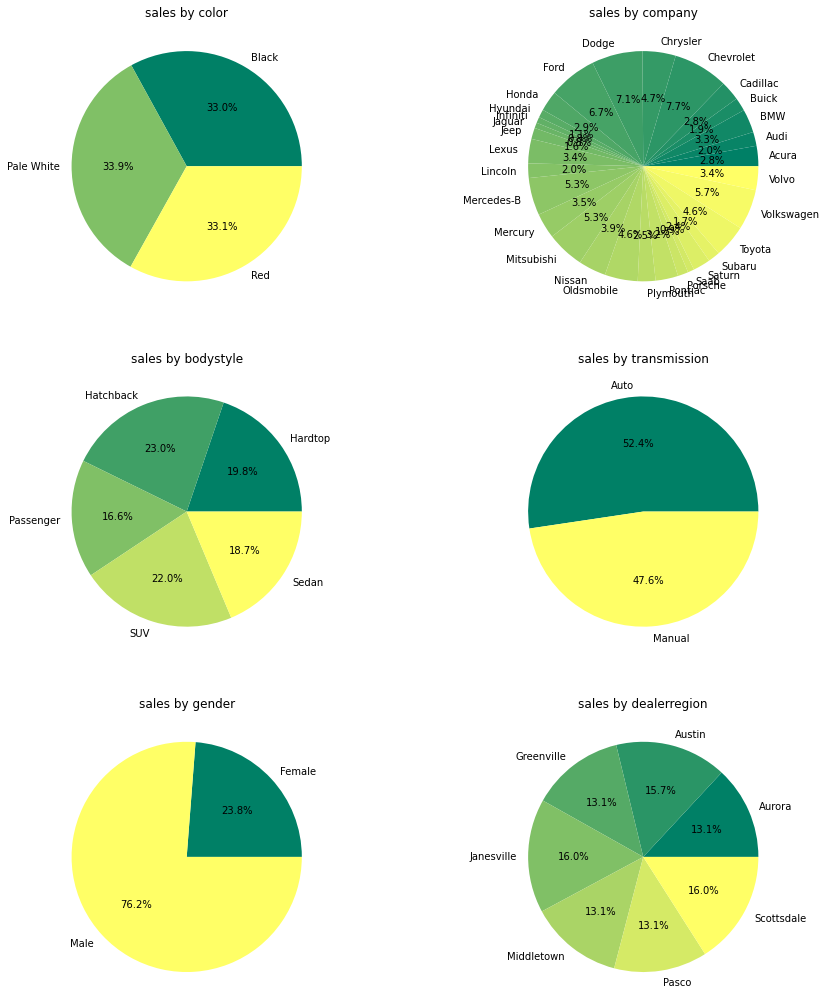

In [6]:
fig,axes=plt.subplots(3,2,figsize=(15,18))
arguments=["color","company","bodystyle","transmission","gender","dealerregion"]
for ax,arg in zip(axes.ravel(),arguments):
    cmap = plt.get_cmap('summer')
    colors = list(cmap(np.linspace(0, 1, len(df[arg].unique()))))
    df.groupby(arg)["customername"].count().reset_index()\
    .plot(kind="pie",y="customername",labels=df.groupby(arg)["customername"].count().reset_index()[arg],\
          autopct="%1.1f%%",ax=ax,legend=False,ylabel="",title="sales by "+arg,colors=colors)

# plot car sales by years and months

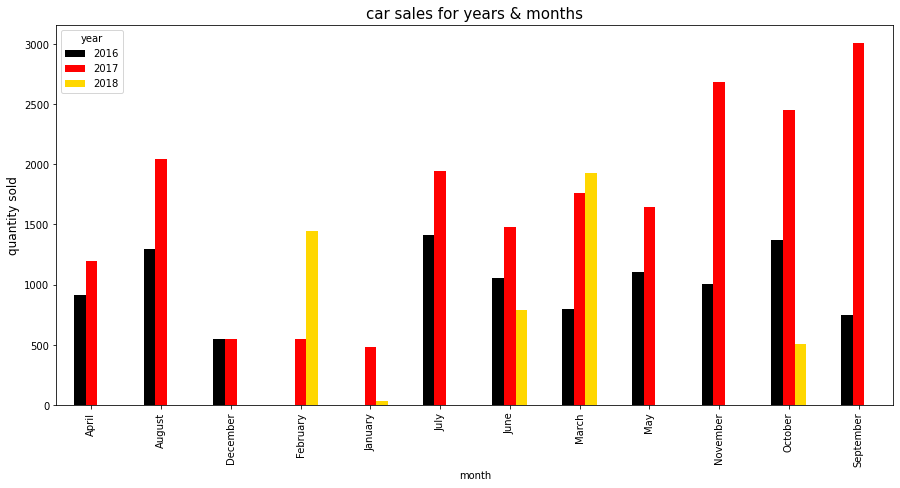

In [7]:
g=df.groupby(["year","month","monthnum"])["customername"].count().reset_index().sort_values(["year","monthnum"],ascending=[True,True])
g["year"]=g["year"].astype(str)
p=g.pivot("month","year","customername").reset_index()
#.merge(g,on="month").sort_values("monthnum").drop_duplicates(subset=["month"])
p.plot(kind="bar",x="month",y=["2016","2017","2018"],figsize=(15,7),color=["k","r","gold"])
plt.title("car sales for years & months",size=15)
plt.ylabel("quantity sold",size=12)
plt.show()

# plot number of sales by date

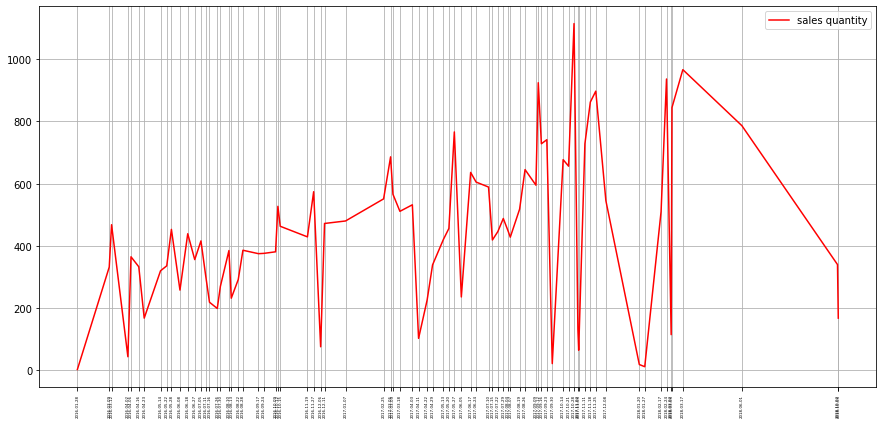

In [8]:
g=df.groupby("date")["customername"].count().reset_index().sort_values("date")
plt.figure(figsize=(15,7))
plt.plot(g.date,g.customername,c="r",label="sales quantity")
plt.xticks(g.date,rotation=90,size=4)
plt.grid(axis="both")
plt.legend()
plt.show()

# plot clients avg annual income by car manufacturer and avg annual income for all car manufacturer(in a nutshell wich manufacturer has the richest clients)

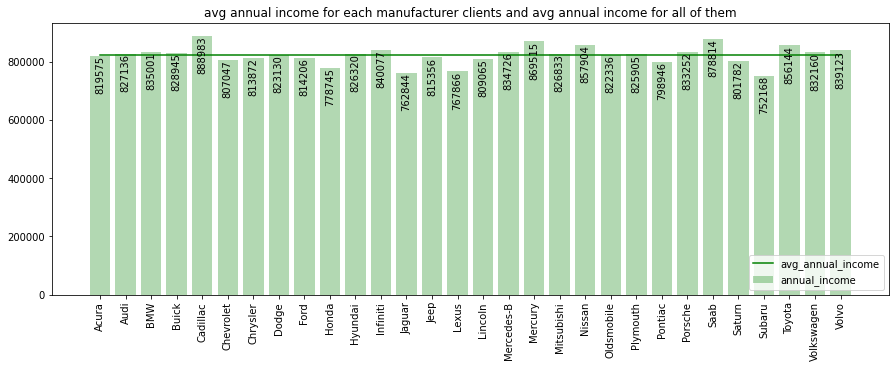

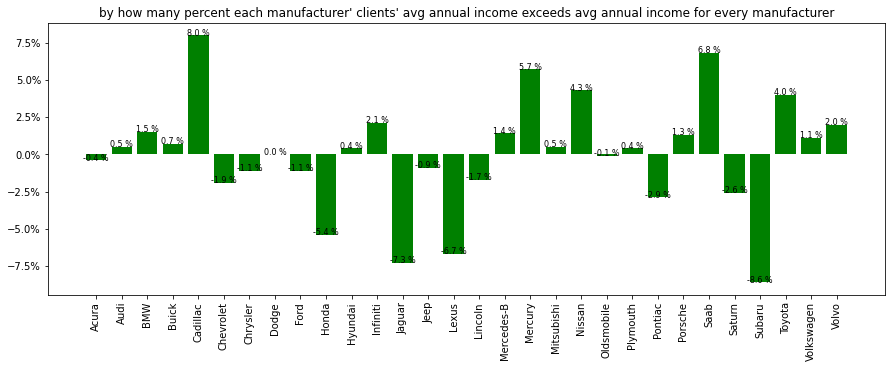

In [9]:
g=df.groupby("company")["annualincome"].mean().reset_index()
g["avg"]=g.annualincome.mean()
g["vs_avg"]=(g.annualincome/g.avg*100-100).round(1)

plt.figure(figsize=(15,5))
plt.bar(g.company,g.annualincome,color="g",alpha=0.3,label="annual_income")
plt.plot(g.company,g["avg"],color="g",label="avg_annual_income")
plt.xticks(rotation=90)
plt.legend(loc="lower right")
plt.title("avg annual income for each manufacturer clients and avg annual income for all of them")

def value_label(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i]),round(y[i]),size=10,ha="center",va="top",rotation=90)
        
value_label(g.company,g.annualincome)
plt.show()

plt.figure(figsize=(15,5))
plt.bar(g.company,g.vs_avg,color="g")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.title("by how many percent each manufacturer' clients' avg annual income exceeds avg annual income for every manufacturer")
def value_label(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i],1),str(round(y[i],1))+" %",size=8,ha="center")
value_label(g.company,g.vs_avg)

plt.show()

# How car sales increased compared to previous month in 2017. In each month by how many percent car sales exceeded  the average sales of 2017 .

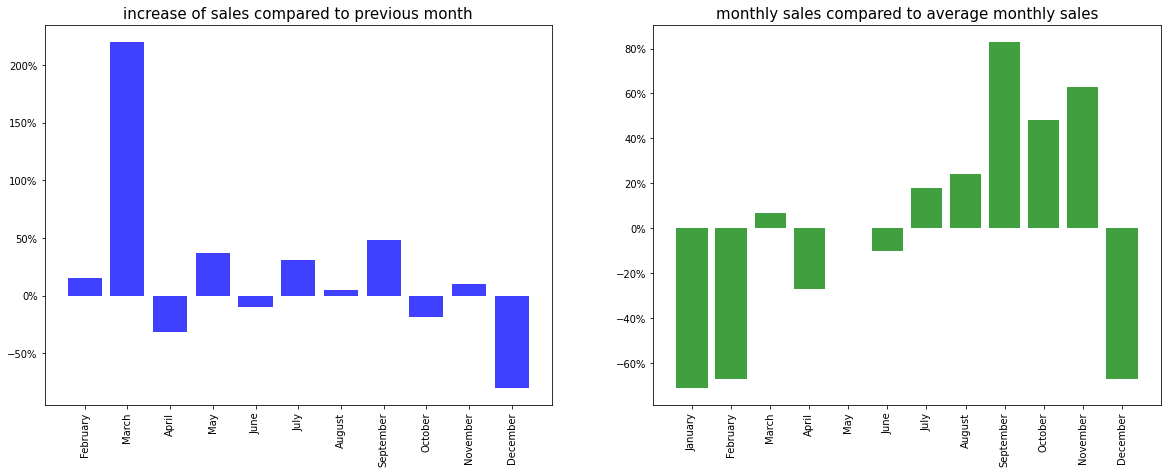

In [12]:
g=df[df.year==2017].groupby(["monthnum","month"])["customername"].count().reset_index()
g["previous_year"]=g.customername.shift(1)
g["increase"]=((g.customername-g.previous_year)/g.previous_year*100).round()
g["avg"]=g.customername.mean()
g["percent_of_avg"]=((g.customername/g.avg-1)*100).round()
fig,ax=plt.subplots(1,2,figsize=(20,7))
plt.subplot(1,2,1)
plt.bar(g.month,g.increase,color="b",alpha=.75)
plt.title("increase of sales compared to previous month",size=15)
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.subplot(1,2,2)
plt.bar(g.month,g.percent_of_avg,color="g",alpha=0.75)
plt.xticks(rotation=90)
plt.title("monthly sales compared to average monthly sales",size=15)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.show()